<a href="https://colab.research.google.com/github/MissSylviaSHI/Explorer/blob/main/test/Statistics%20related%20python/Week2%20/ima_related.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Interval
count   50.000000
mean   129.920000
std    102.482421
min     14.000000
25%     46.250000
50%     93.000000
75%    155.500000
max    445.000000
Box Plot Values:
Q1: 46.25, Q3: 155.5, IQR: 109.25
Lower Bound for Outliers: -117.625
Upper Bound for Outliers: 319.375

Rounded Number of classes: 6
class Range: 71.83333333333333


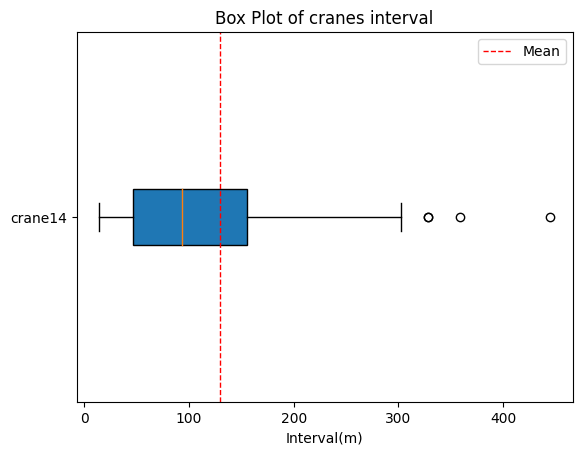

Classes:
     Interval  Frequency
0   85.833333         21
1  157.666667         17
2  229.500000          3
3  301.333333          4
4  373.166667          4
5  445.000000          1 



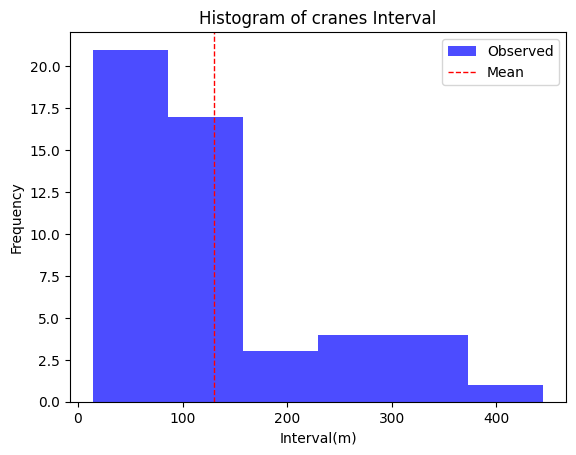

Chi-Square Table:
           χ^2
0     1.120910
1     0.817291
2     6.174963
3     0.622793
4     2.254548
5     0.966799
Sum  11.957304
Number of classes (bins) using Sturges' formula: 6
Chi-square Statistic: 11.957304286157845, p-value: 0.007575221363088894


,CDF,Bin Frequency,Expected Value
0,0.33353,0.333530,16.676480
1,0.606707,0.273177,13.658853
2,0.834395,0.227688,11.384409
3,0.952798,0.118403,5.920166
4,0.991191,0.038393,1.919636
5,0.998946,0.007755,0.387738
6,Sum =,0.998946,50.000000


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Sample interval data
Interval_data = np.array([39,135,57,31,190,90,293,151,26,77,82,156,328,92,138,47,45,
                          140, 140, 112, 90, 32, 154, 359, 207, 61, 39, 40,
                          69,14,38,94,46,36,84,106,269,445,42,108,244,92,148,303,24,328,207,260,132,56])
Interval_df = pd.DataFrame(Interval_data, columns=['Interval'])
desc_stats = Interval_df.describe()
print(desc_stats)

# Calculating the boundaries for outliers  用于计算异常值的边界
# IQR = Q3 - Q1 计算了四分位数范围（IQR），即Q3与Q1之间的差值
# lower_bound = Q1 - (1.5 * IQR): 这一行代码计算了异常值的下边界。下边界通过将1.5倍的IQR从Q1中减去得到。
Q1 = Interval_df['Interval'].quantile(0.25)
Q3 = Interval_df['Interval'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
# Displaying the results
print("Box Plot Values:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}\n")

# Calculate mean and standard dviation
mean = np.mean(Interval_data)
std_dev = np.std(Interval_data, ddof=1)

# Calculate Sturges' number of bins
n = len(Interval_data)   # 计算数据集的样本数量
k = int(1 + 3.322 * np.log10(n)) # 计算No. of classes
classrange=np.ptp(Interval_data)/k  # np.ptp()在这里的作用是计算峰值之差，即range
print("Rounded Number of classes:",k)
print("class Range:",classrange)
# Histogram and expected frequencies
hist, bin_edges = np.histogram(Interval_data, bins=k)
cdf_values = stats.norm.cdf(bin_edges+classrange, mean, std_dev) #stats.norm.cdf是SciPy库中用于计算正态分布CDF的函数

# Box plot
plt.boxplot(Interval_data, vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of cranes interval')
plt.xlabel('Interval(m)')
plt.yticks([1], ['crane14'])
plt.legend()
plt.show()

# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'Interval': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values)-1):
    if i==0:
      frequency=cdf_values[0]
    else:
      frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies= np.array(bin_frequencies)

# Expected values
expected_values = bin_frequencies * n

# Normalize expected frequencies
expected_frequencies_normalized = expected_values * (hist.sum() / expected_values.sum())

# Calculate chi-square values for each bin，hist表示直方图中每个区间的频率（Frequency）
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies_normalized,ddof=2)
hist_df.Interval=hist_df.Interval+classrange
print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]

# Histogram
plt.hist(Interval_data, bins=bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of cranes Interval')
plt.xlabel('Interval(m)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Chi-Square Table:")
print(chi_square_df)

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_frequencies_normalized.sum()]
})

# Append the sum row to the table
table_df =  pd.concat([table_df, sum_row], ignore_index=True)

# Print the results
print(f"Number of classes (bins) using Sturges' formula: {k}")
print(f"Chi-square Statistic: {chi_square_values.sum()}, p-value: {p_value}")


# Display the table
table_df


In [ ]:
from google.colab import files

# 选择并上传文件
uploaded = files.upload()

Saving IMA1.csv to IMA1.csv


In [ ]:
import os

# 列出当前工作目录中的文件列表
os.listdir()
import os

# 列出当前工作目录中的文件列表
file_list = os.listdir()

# 遍历文件列表，找到目标文件的路径
target_file = "IMA1.csv"  # 将 "your_file_name.csv" 替换为您要查找的文件名
target_file_path = None

for file in file_list:
    if file == target_file:
        target_file_path = os.path.abspath(file)
        break

if target_file_path:
    print("目标文件的完整路径：", target_file_path)
else:
    print("找不到目标文件。")

目标文件的完整路径： /content/IMA1.csv


   Crane14  Crane15  Crane16
0    140.0       69     39.0
1    140.0       14    135.0
2    112.0       38     57.0
3     90.0       94     31.0
4     32.0       46    190.0


<Axes: >

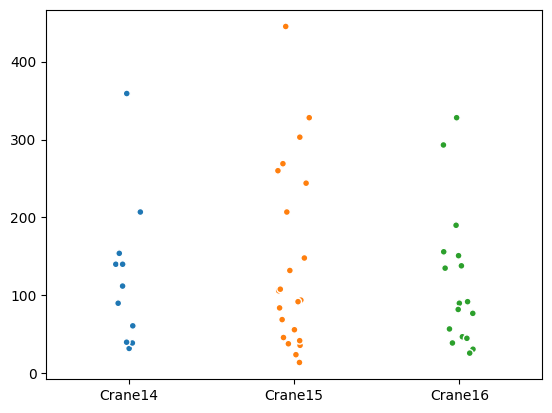

In [ ]:
import seaborn as sns
import pandas as pd
# 用以将 CSV 文件转换为 Pandas DataFrame
df = pd.read_csv("/content/IMA1.csv")
print(df.head())
sns.stripplot(data=df, jitter=True, size=5, edgecolor='w', linewidth=1, marker='o')
# df['column_name'] 如果只想对某一列操作

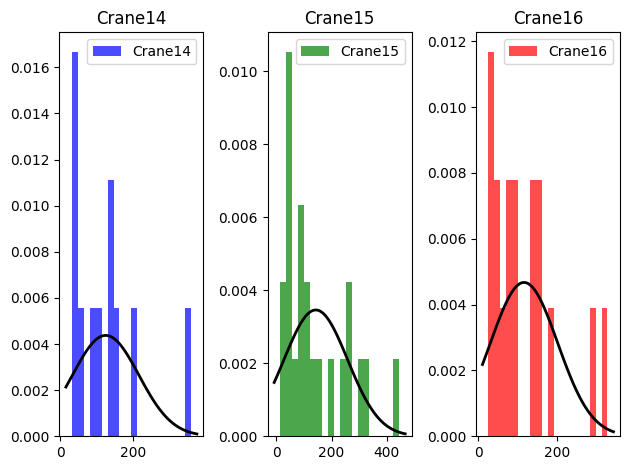

nan
No group mean is significantly different


In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Group 1
# df.rename(columns={'old_name': 'new_name'}, inplace=True) 可以使用 Pandas 的 rename() 方法来修改 DataFrame 中的列名。例如，假设你想将列名 'old_name' 修改为 'new_name'，你可以使用以下代码：
# df.rename(columns={'old_name1': 'new_name1', 'old_name2': 'new_name2'}, inplace=True) 对多个进行修改
plt.subplot(1, 3, 1)
plt.hist(df['Crane14'], bins=20, color='blue', alpha=0.7, label='Crane14', density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf (x, np.mean(df['Crane14']), np.std(df['Crane14']))
plt.plot(x, p, 'k', linewidth=2)
plt.title('Crane14')
plt.legend()


# Group 2
plt.subplot(1, 3, 2)
plt.hist(df['Crane15'], bins=20, color='green', alpha=0.7, label='Crane15', density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(df['Crane15']), np.std(df['Crane15']))
plt.plot(x, p, 'k', linewidth=2)
plt.title('Crane15')
plt.legend()

# Group 3
plt.subplot(1, 3, 3)
plt.hist(df['Crane16'], bins=20, color='red', alpha=0.7, label='Crane16', density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(df['Crane16']), np.std(df['Crane16']))
plt.plot(x, p, 'k', linewidth=2)
plt.title('Crane16')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Performing the One-Way ANOVA
anova_result = stats.f_oneway(df['Crane14'],df['Crane15'], df['Crane16'])

print(anova_result.pvalue)

# Interpreting the result
if anova_result.pvalue < 0.05:
    print("At least one group mean is different")
else:
    print("No group mean is significantly different")


